Notebook 7: Perceptron
===========================

## Goals for learning
In this assignment, we will:
1) Perform a deep-dive into the **Perceptron** algorithm
2) Practice working with the array-oriented programming paradigm
3) Gain experience working with off-the-shelf machine learning and data analysis libraries

## Instructions
* Read through the notebook.
* Answer any plain text questions (replace cell content, "YOUR RESPONSE HERE", with your response).
* Insert your code within the code blocks marked with the comments "# START your code here" and "# STOP your code here".
* Do not use loops, iteration, or recursion in any of the code cells (except where explicitly allowed).
* **When transforming collections of items in the same manner, do not simply copy/paste with an index into each item. Instead, you should be using array operations.**
* Do not use any "Generative AI" tools or assistants in the creation of your solutions.
* Do not import or use any libraries other than those already imported outside the "# START your code here" and "# STOP your code here" blocks.
    * In some blocks, you are not allowed to use certain numpy and pandas methods. Please pay attention to the "TO DO" instructions.
* Run all cells to make sure your code works and you see reasonable results.
    * All code cells should have output indicating the results of the last run when the notebook is submitted.
    * If there are errors, or if a code cell does not have output as submittted, points will be deducted.

## Submission details
* Due: Monday 11/03, 11:59 PM
* [Submission instructions](https://www.cs.oswego.edu/~agraci2/csc461/submission_instructions.html)

## Notebook premise
You are an ML engineer at a large medical research company. Many of the products your company is working on involve diagnostic **binary classification** tasks.
In order to boost productivity, the software engineering team is pushing for more code reuse between products.
You decide to implement a reuable library based on the **Perceptron** algorithm.

## Perceptron Library

### Importing Dependencies

In [2]:
import numpy as np
seed = 42
np.random.seed(seed)

### The Activation Function
Using the line that was learned from gradient descent for prediction results in an **unbounded** number. In order to make **binary classification** predictions, we need a way to map those unbounded real values to our set of labels, $Y=\{0,1\}$.

In order to do this, we can use a **step function**, specifically the **[Heaviside Step Function](https://en.wikipedia.org/wiki/Heaviside_step_function)**, where numbers less than zero map to "$0$", and numbers zero or greater map to $1$.

In [3]:
def HeavisideStep(linear):
    result = None
    
    # START your code here
    result = np.where(linear < 0, 0, 1)
    # STOP your code here
    
    return result

In [4]:
def TestHeavisideStep():
    expected = np.array([1, 1, 0])
    input = np.array([0.0, 0.1, -0.2])
    observed = HeavisideStep(input)
    assert np.array_equal(expected, observed)

# Checkpoint to validate the Heaviside step function
TestHeavisideStep()
print("Passed checkpoint.")

Passed checkpoint.


### Perceptron Score
Next, you implement a function to determine the "perceptron score" or the weighted sum of inputs X.
This is determined by evaluating the input vector X using the linear equation defined by W, b.

$$ \textsf{Score} = WX+b $$

In [20]:
# Evaluate the input vector X using the linear equation defined by W, b
def Score(X, W, b):
    score = None

    # START your code here
    score = X @ W + b
    score = score[:, np.newaxis]
    # STOP your code here

    assert score.shape == (X.shape[0],1)
    return score

In [24]:
# # EMMA TEST
# X = np.array([[1,2,3],[30,5,10]])
# print('X shape: ',np.shape(X))
# W = np.array([1,-1,2])
# print('W shape: ',np.shape(W))
# b = 100
# print('b shape: ',np.shape(b))
# score = X @ W + b
# print('scores: ',score)
# print('score shape: ',np.shape(score))
# print('reshaped score shape: ',score[:, np.newaxis])
# print('X.shape[0]: ',X.shape[0])

In [25]:
# Checkpoint for perceptron score
X = np.array([[1,2,3],[30,5,10]])
W = np.array([1,-1,2])
b = 100
observed = Score(X, W, b)
expected = np.array([[105], [145]])
assert np.array_equal(expected, observed), "Expected: {}, Observed: {}".format(expected, observed)
print("Passed checkpoint")

Passed checkpoint


### Prediction
Now that you have a method of generating a perceptron score and you have your activation function, you can put them together to generate binary classification predictions for your input data.

In [28]:
### Prediction: step(score)
def Predict(X, W, b):
    Y_p = None

    # START your code here
    Y_p = X.dot(W) + b
    Y_p = np.where(Y_p < 0, 0, 1)
    Y_p = Y_p[:, np.newaxis]
    # STOP your code here

    assert Y_p.shape == (X.shape[0],1)
    return Y_p

In [29]:
# Checkpoint for perceptron score
X = np.array([[1,7,2],[7,2,1]])
W = np.array([1,-1,2])
b = 1
observed = Predict(X, W, b)
expected = np.array([[0], [1]])
assert np.array_equal(expected, observed), "Expected: {}, Observed: {}".format(expected, observed)
print("Passed checkpoint")

Passed checkpoint


### Synthetic Test Data
While developing your library, you use some simple synthetic data to verify that it is working correctly.

In [30]:
# Generate data based on the given line/boundary, but add some noise
def GenerateSyntheticData(w, b, num_examples):
    X = np.random.normal(0, 1, (num_examples, len(w)))
    Y = X @ w + b
    Y += np.random.normal(0, 0.01, Y.shape)
    Y = Y.reshape((-1, 1))
    Y = HeavisideStep(Y)
    return X, Y

### Debug and Visualization Tools

You decide that you need a mechanism to determine how well your classifier is performing and decide to use a simple accuracy function. 
$$\textsf{Accuracy}={{\textsf{TP}+\textsf{TN}}\over{\textsf{TP}+\textsf{TN}+\textsf{FP}+\textsf{FN}}}$$

In [33]:
# Takes in the true labels (Y_t) and the predicted labels (Y_p). Returns a float (the accuracy)
def Accuracy(Y_t, Y_p):
    
    # START your code here
    tp = sum(np.logical_and(Y_p==1,Y_t==1))
    fp = sum(np.logical_and(Y_p==1,Y_t==0))
    tn = sum(np.logical_and(Y_p==0,Y_t==0))
    fn = sum(np.logical_and(Y_p==0,Y_t==1))
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    # STOP your code here
    
    return accuracy

In [34]:
# Checkpoint for accuracy
Y_t = np.array([[0], [1]])
Y_p = np.array([[1], [1]])
observed = Accuracy(Y_t, Y_p)
expected = 0.5
assert expected == observed, "Expected: {}, Observed: {}".format(expected, observed)
print("Passed checkpoint")

Passed checkpoint


You decide that you also want to be able to visualize the synthetic data as a way to see how well different boundaries separate the data by class label.

In [35]:
# Add a plotting function to help visualize the iterative changes to our lines
import matplotlib.pyplot as plt

# Plot X[0] vs y with the associated lines
def DisplayPlot(X,y,W,b,W2,b2,label1,label2,x_special=None):
    y_0 = np.where(y > 0, True, False)
    y_1 = np.logical_not(y_0)
    x0_0 = (X[:,0].reshape(X.shape[0],1))[y_0]
    x0_1 = (X[:,0].reshape(X.shape[0],1))[y_1]
    x1_0 = (X[:,1].reshape(X.shape[0],1))[y_0]
    x1_1 = (X[:,1].reshape(X.shape[0],1))[y_1]
    plt.plot(x0_0, x1_0, 'bo')
    plt.plot(x0_1, x1_1, 'r^')
    if x_special is not None:
        plt.plot(x_special[0], x_special[1], 'go')
    lim_x = plt.gca().get_xlim()
    lim_y = plt.gca().get_ylim()
    plt.axline(xy1=(0, b/(-1*W[1])), slope=(W[0]/(-1*W[1])), label=label1)
    plt.axline(xy1=(0, b2/(-1*W2[1])), slope=(W2[0]/(-1*W2[1])), color='orange', label=label2)
    plt.gca().set_xlim(lim_x)
    plt.gca().set_ylim(lim_y)
    plt.legend(loc='best')
    plt.show()

You then decide to try out your new visualization tool with a made up line/boundary and synthetic data.

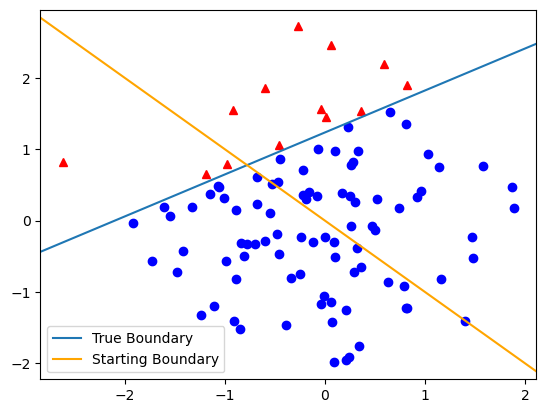

True Boundary Accuracy: [1.]
Starting Boundary Accuracy: [0.37]


In [36]:
def TestSyntheticData():
    # Initialize "True" Weights and Bias plus Data
    W_t = np.array([2, -3.4])
    b_t = 4.2
    X, Y = GenerateSyntheticData(W_t, b_t, 100)

    # Initialize Random Starting Weights and Bias
    W_s = np.array([0.1, 0.1])
    b_s = 0.0
    
    DisplayPlot(X, Y, W_t, b_t, W_s, b_s, "True Boundary", "Starting Boundary")
    print("True Boundary Accuracy: {}".format(Accuracy(Y, Predict(X, W_t, b_t))))
    print("Starting Boundary Accuracy: {}".format(Accuracy(Y, Predict(X, W_s, b_s))))
    
TestSyntheticData()

### Improving the model with Gradient Descent
Before you can implement your **neurons**, which split the data using a **line**, you must first teach them how to find a good line. 
The **Gradient Descent** algorithm can help you take a random line, and iteratively improve it by minimizing an **error function**.

For the perceptron algorithm, this process looks a bit different than it did during linear regression. If a point is classified correctly ($y_p = y_t$), then there is no error, and we should not adjust our weights and bias. If a point is classified incorrectly, we want to move the line towards that point by a small amount, where "small" is defined by our learning rate.

An equation that formalizes this for weights is as follows:
$$ w_i^{new} = w_i^{old} + \textsf{LR} * (y_t - y_p) * x_i $$

An equation that formalizes this for the bias is as follows:
$$ b^{new} = b^{old} + \textsf{LR} * (y_t - y_p) $$

Think through these equations. 
* What do they evaluate to if there is a correct classification ($y_p = y_t$)?
* How do the evaluations differ if there is a false positive ($y_p > y_t$) vs. a false negative ($y_p < y_t$)?

In [57]:
# Perform one step of the Gradient Descent Algorithm
def StepGradientDescent(X, Y_t, W, b, lr, display):
    W_prev = W.copy()
    b_prev = b
    selected_idx = np.random.randint(low=0, high=X.shape[0])
    
    '''
    TO DO:
    1) Calculate the predicted labels given the current line (Y_p)
    2) Use the random "selected_idx" to identify the point of interest for this epoch
    3) If the predicted label for this point of interest matches its true label, then
           a) Do not change the weights W
           b) Do not change the bias b
       Otherwise, modify the weights and bias towards the point of interest, adjusted by the learning rate
    '''
    
    # START your code here
    #1
    Y_p = Predict(X, W, b)

    #2
    x_i = X[selected_idx].flatten()
    y_true = Y_t[selected_idx]
    y_pred = Y_p[selected_idx].item()
    
    #3
    if (y_pred != y_true):
        error = (y_true - y_pred).item()
        W = W + lr * error * x_i
        b = float(b + lr * error) 
    else:
        error = 0
    # STOP your code here
    
    if display:
        if (b != b_prev) or not (np.array_equal(W, W_prev)):
            print("Previous Accuracy: {}".format(Accuracy(Y_t, Y_p)))
            DisplayPlot(X, Y_t, W_prev, b_prev, W, b, "Previous", "Current", X[selected_idx])
    
    return W, b

In [58]:
# Run the gradient descent algorithm with all data points at once
def GradientDescent(W, b, X, Y, lr, epochs, display):
    for i in range(epochs):
        if display:
            print("Epoch: {}".format(i))
        W, b = StepGradientDescent(X, Y, W, b, lr, display)
    return W, b

Epoch: 0
Epoch: 1
Epoch: 2
Previous Accuracy: [0.52]


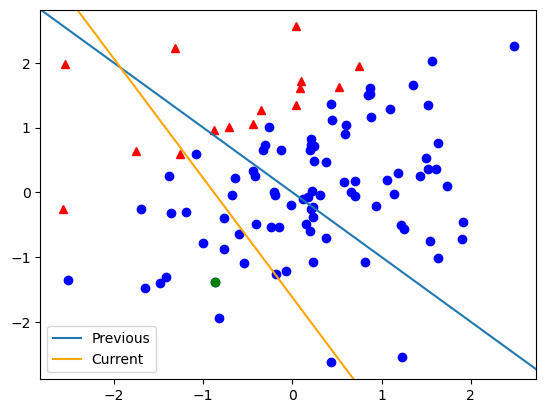

Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Previous Accuracy: [0.73]


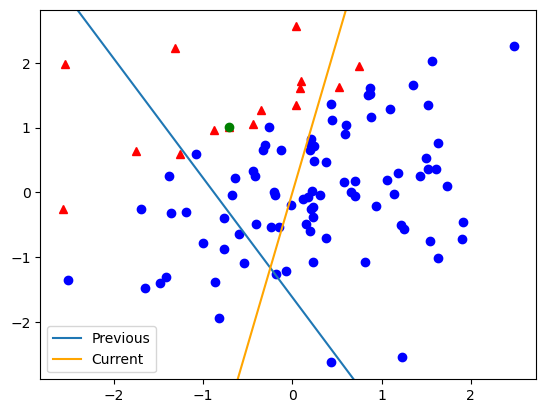

Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Previous Accuracy: [0.69]


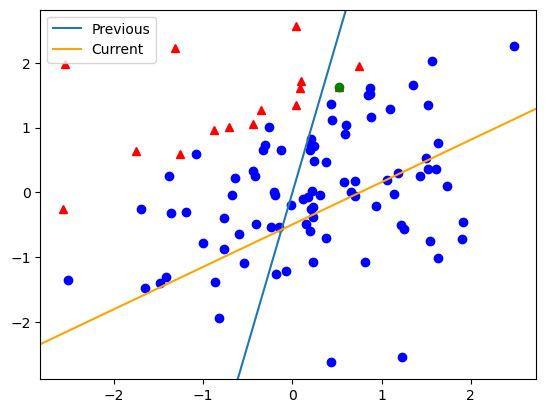

Epoch: 15
Epoch: 16
Epoch: 17
Previous Accuracy: [0.41]


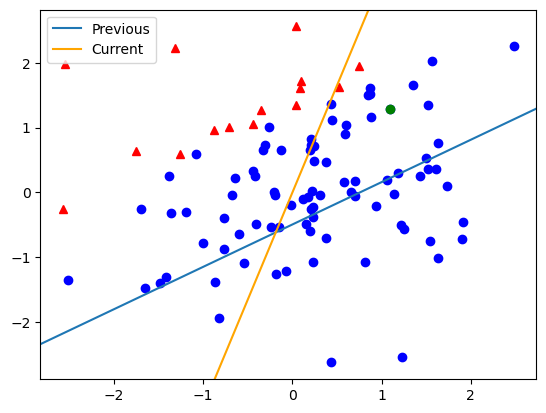

Epoch: 18
Previous Accuracy: [0.68]


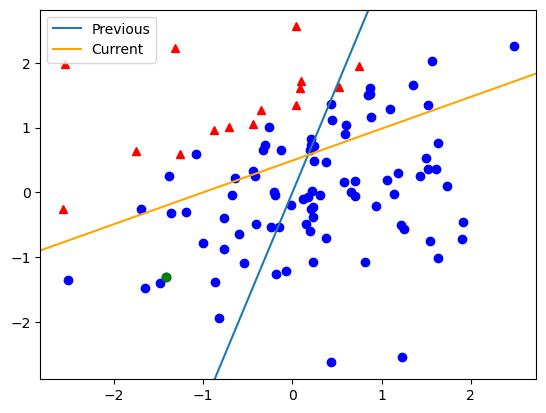

Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Previous Accuracy: [0.74]


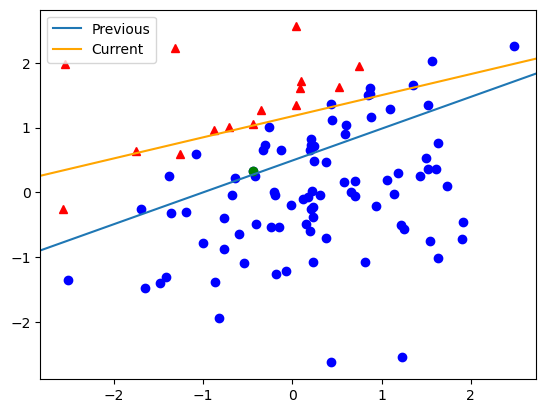

Epoch: 34
Epoch: 35
Epoch: 36
Previous Accuracy: [0.91]


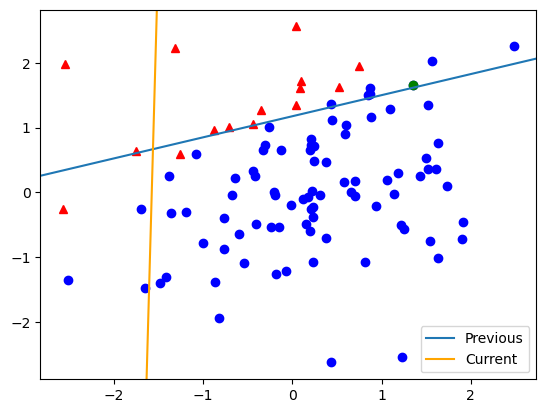

Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Previous Accuracy: [0.85]


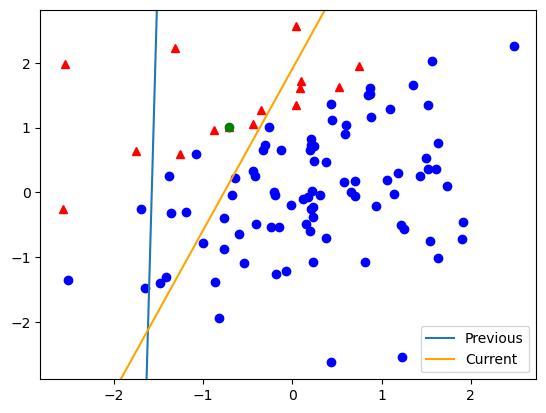

Epoch: 44
Previous Accuracy: [0.86]


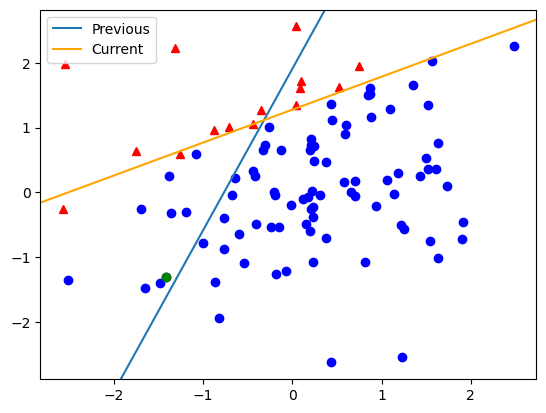

Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Previous Accuracy: [0.98]


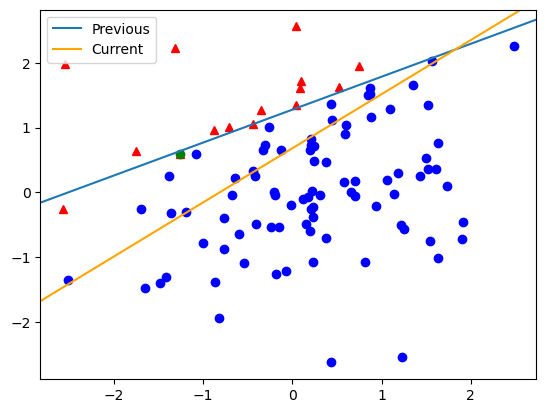

Epoch: 98
Epoch: 99
Epoch: 100
Previous Accuracy: [0.82]


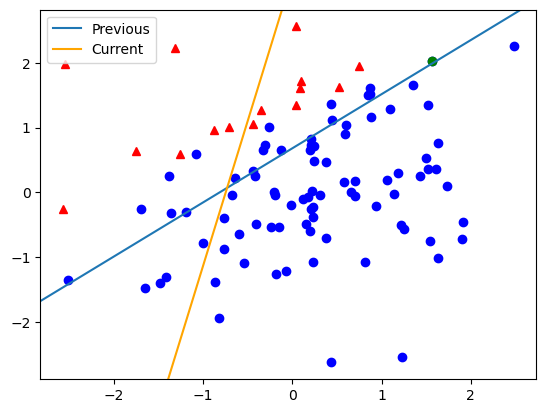

Epoch: 101
Epoch: 102
Epoch: 103
Epoch: 104
Previous Accuracy: [0.82]


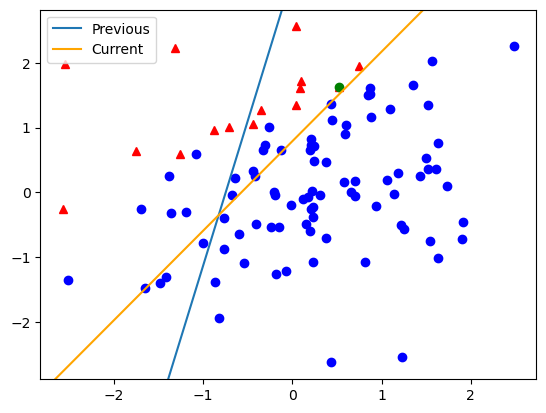

Epoch: 105
Epoch: 106
Epoch: 107
Epoch: 108
Previous Accuracy: [0.85]


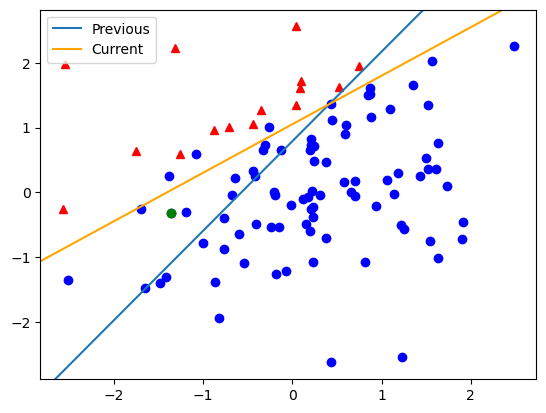

Epoch: 109
Epoch: 110
Epoch: 111
Epoch: 112
Epoch: 113
Epoch: 114
Epoch: 115
Epoch: 116
Epoch: 117
Epoch: 118
Epoch: 119
Epoch: 120
Epoch: 121
Epoch: 122
Epoch: 123
Epoch: 124
Epoch: 125
Epoch: 126
Epoch: 127
Previous Accuracy: [0.97]


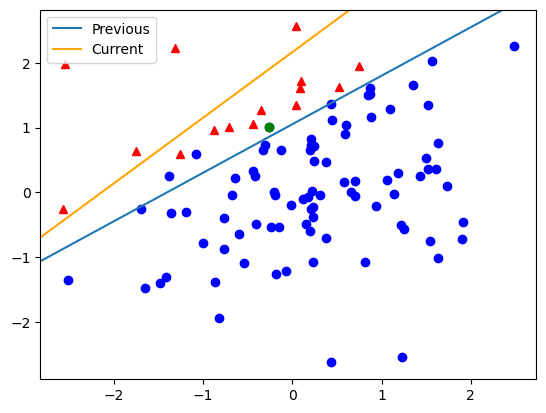

Epoch: 128
Previous Accuracy: [0.9]


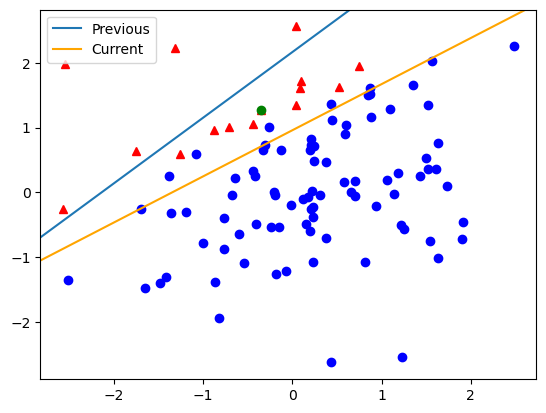

Epoch: 129
Epoch: 130
Epoch: 131
Epoch: 132
Epoch: 133
Epoch: 134
Epoch: 135
Epoch: 136
Epoch: 137
Epoch: 138
Epoch: 139
Previous Accuracy: [0.95]


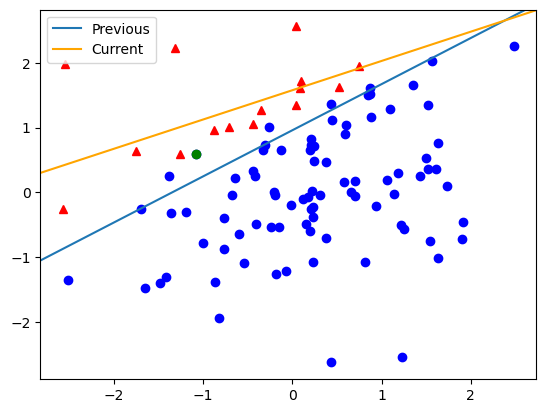

Epoch: 140
Epoch: 141
Epoch: 142
Epoch: 143
Epoch: 144
Epoch: 145
Epoch: 146
Epoch: 147
Epoch: 148
Epoch: 149
Epoch: 150
Previous Accuracy: [0.9]


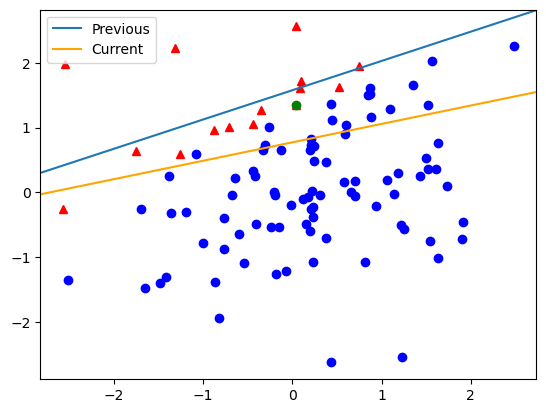

Epoch: 151
Epoch: 152
Epoch: 153
Epoch: 154
Epoch: 155
Previous Accuracy: [0.84]


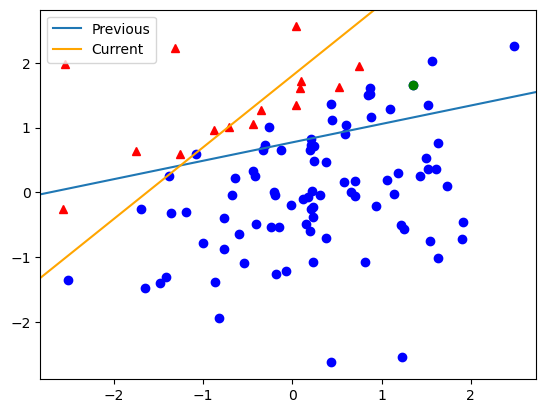

Epoch: 156
Epoch: 157
Epoch: 158
Epoch: 159
Epoch: 160
Epoch: 161
Epoch: 162
Epoch: 163
Epoch: 164
Previous Accuracy: [0.92]


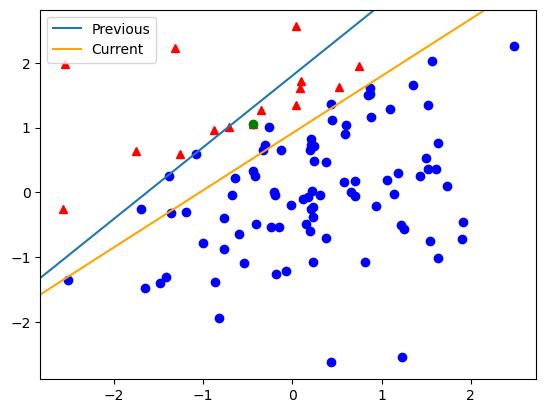

Epoch: 165
Epoch: 166
Epoch: 167
Epoch: 168
Epoch: 169
Epoch: 170
Epoch: 171
Epoch: 172
Epoch: 173
Epoch: 174
Epoch: 175
Previous Accuracy: [0.93]


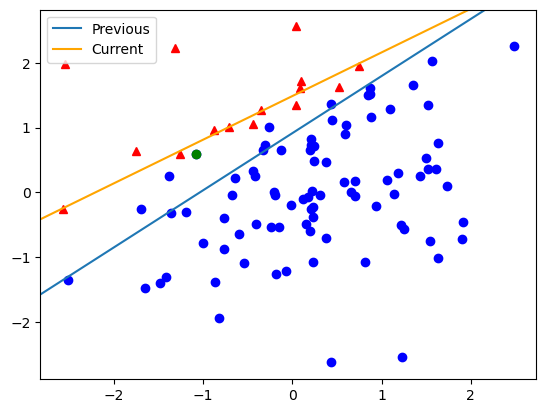

Epoch: 176
Epoch: 177
Epoch: 178
Epoch: 179
Epoch: 180
Previous Accuracy: [0.93]


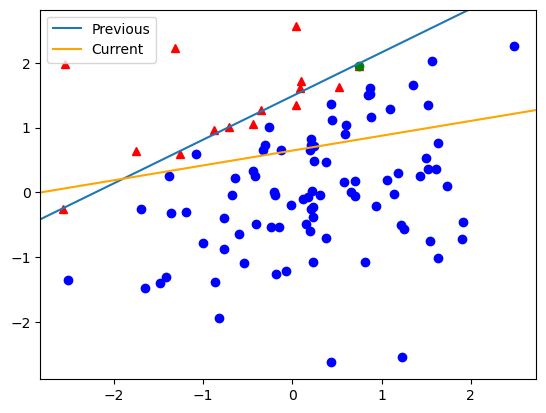

Epoch: 181
Epoch: 182
Epoch: 183
Epoch: 184
Previous Accuracy: [0.78]


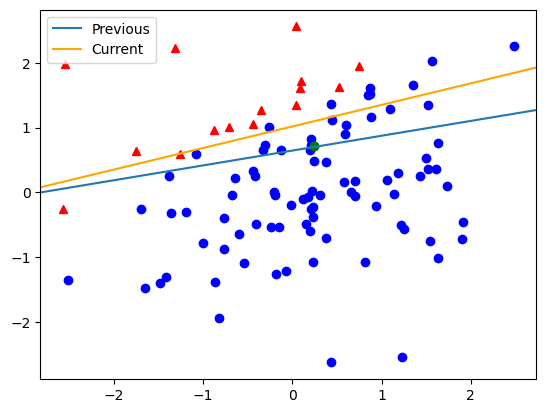

Epoch: 185
Previous Accuracy: [0.9]


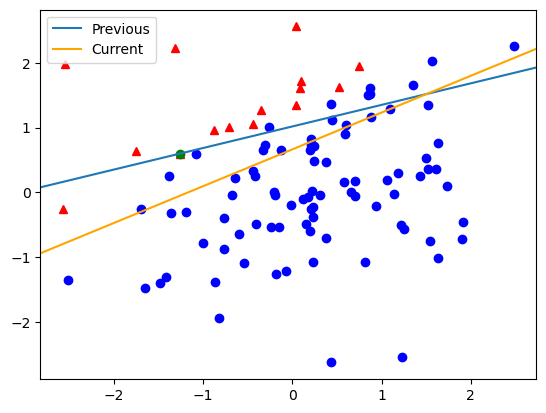

Epoch: 186
Previous Accuracy: [0.81]


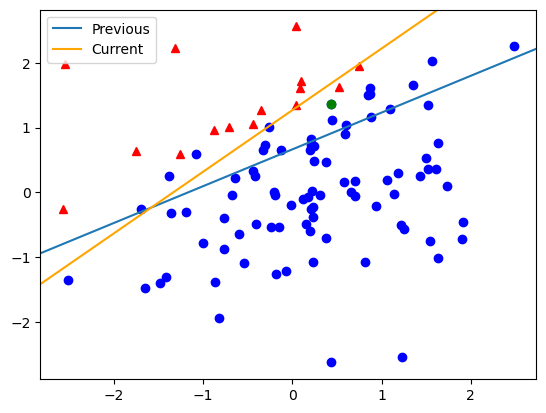

Epoch: 187
Epoch: 188
Epoch: 189
Epoch: 190
Epoch: 191
Epoch: 192
Epoch: 193
Epoch: 194
Epoch: 195
Epoch: 196
Epoch: 197
Epoch: 198
Epoch: 199
True weights and bias: [ 2.  -3.4], 4.2
Learned weights and bias: [ 0.14968055 -0.15730397], 0.2
Observed accuracy after training: [0.95]


In [60]:
def TestGradientDescent():
    # Initialize "True" Weights and Bias plus Data
    W_t = np.array([2, -3.4])
    b_t = 4.2
    X, Y_t = GenerateSyntheticData(W_t, b_t, 100)
    
    # Initialize with the starting weight and bias
    W = np.array([0.1, 0.1])
    b = 0.0

    # START your code here
    ''' Feel free to modify the hyperparameters '''
    epochs = 200 # Epochs: how many times to iterate
    lr = 0.05 # Learning Rate (lr): how quickly to change during each iteration
    display=True # If set to true, display a graph and detailed data for each step
    # STOP your code here
    
    # Run the Gradient Descent algorithm on our synthetic data
    W, b = GradientDescent(W, b, X, Y_t, epochs=epochs, lr=lr, display=display)

    print("True weights and bias: {}, {}".format(W_t, b_t))
    print("Learned weights and bias: {}, {}".format(W, b))

    Y_p = Predict(X, W, b)
    observed_accuracy = Accuracy(Y_t, Y_p)
    print("Observed accuracy after training: {}".format(observed_accuracy))
    
    # Checkpoint
    passing_accuracy = 0.92 # Note: you should theoretically be able to get 1.0
    assert observed_accuracy >= passing_accuracy
    
TestGradientDescent()

### Reflections

##### **Question:** Is the gradient descent algorithm defined above an example of "batch", "minibatch", or "stochastic" gradient descent? How can you tell?

## Assembling a Neuron

In [61]:
class Neuron:
    
    # Initialize the neuron with hyperparameters
    def __init__(self, lr, epochs, display=False):
        self.lr = lr
        self.epochs = epochs
        self.display = display
        self.W = None
        self.b = 0.0
        
    # Train the neuron, so it can learn weights and a bias
    def Train(self, X, Y):
        self.W = np.random.normal(0.0, 0.01, (X.shape[1],))
        
        '''
        TO DO: Learn the weights and bias
        '''
        # START your code here
        Y = Y.reshape(-1, 1)
        X_bias = np.hstack([X, np.ones((X.shape[0], 1))])
        W_full = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ Y

        # Separate weights and bias
        self.W = W_full[:-1].flatten()
        self.b = W_full[-1, 0]
        # START your code here
    
    # Predict a label for a new datapoint
    def Predict(self, X):
        Y_p = None
        
        '''
        TO DO: Make a prediction
        1) Calculate a value using the learned line
        2) Pass that value through your activation function
        '''
        # START your code here
        z = X @ self.W + self.b
        Y_p = (z >= 0).astype(int)
        # START your code here
        
        return Y_p

## Testing the Neuron

In [62]:
# Initialize "True" Weights and Bias for test data
W_t = np.array([2, -3.4])
b_t = 4.2

# Generate test and evaluation data
X_input, Y_input = GenerateSyntheticData(W_t, b_t, 100)
X_train = X_input[:80]
X_eval = X_input[80:]
Y_train = Y_input[:80]
Y_eval = Y_input[80:]

In [63]:
def TestPerceptron(neuron):

    # Train a neuron and use it to make predictions 
    neuron.Train(X_train, Y_train)
    Y_pred = neuron.Predict(X_eval)

    # Check the accuracy
    print("True labels: {}".format(Y_eval.flatten()))
    print("Predicted labels: {}".format(Y_pred.flatten()))
    accuracy = Accuracy(Y_eval, Y_pred)
    print("Accuracy: {}".format(accuracy))
    return accuracy
    
neuron = Neuron(epochs=3, lr=0.0001)
accuracy = TestPerceptron(neuron)

True labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [64]:
'''
TO DO: Modify the neuron's hyperparameters to improve the accuracy
'''
# START your code here 
neuron = Neuron(epochs=30, lr=0.01)
# STOP your code here

accuracy = TestPerceptron(neuron)

# START your code here 
THRESHOLD = 0.95
# STOP your code here

assert accuracy >= THRESHOLD, "Observed accuracy: {}".format(accuracy)

True labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()